In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##Load Data

In [2]:
df = pd.read_excel("/content/Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


##Cleaning data

In [7]:
#drop null values
df.dropna(subset=['CustomerID'], inplace = True)

#remove canceled orders with invoice starting with C
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

#create new col
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

/tmp/ipython-input-7-2885677980.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [9]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,397924.000000,397924,397924.000000,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171,22.394749
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.420210,NaN,22.096788,1713.169877,309.055588


##RFM - recency, frequency, monetary

In [10]:
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1) # +1 than the last day

#group by customer id
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x : (ref_date - x.max()).days, #rececncy(no of days since last buy)
    'InvoiceNo' : 'nunique', #freq (no of orders)
    'TotalPrice' : 'sum' #monetary(money spent)
})

rfm.columns = ['recency', 'frequency', 'monetary']
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [11]:
rfm.shape

(4339, 3)

##KMeans

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sc = StandardScaler()
rfm_sc = sc.fit_transform(rfm)


##To Select optimal number of clusters

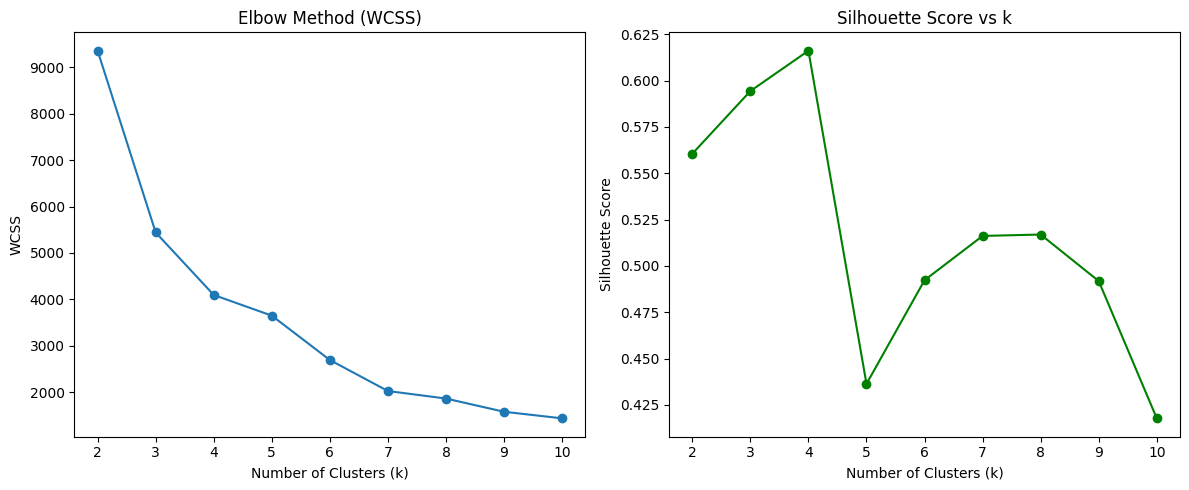

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow method + Silhouette Score
wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(rfm_sc)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_sc, labels))

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method (WCSS)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [21]:
# Try different values of k
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(rfm_sc)
    score = silhouette_score(rfm_sc, labels)
    print(f"Silhouette Score for k={k}: {score:.4f}")


Silhouette Score for k=2: 0.5605
Silhouette Score for k=3: 0.5943
Silhouette Score for k=4: 0.6161
Silhouette Score for k=5: 0.4363
Silhouette Score for k=6: 0.4923
Silhouette Score for k=7: 0.5162
Silhouette Score for k=8: 0.5169
Silhouette Score for k=9: 0.4918
Silhouette Score for k=10: 0.4177


In [14]:
k = KMeans(n_clusters= 4, random_state=42)
rfm['cluster'] = k.fit_predict(rfm_sc)

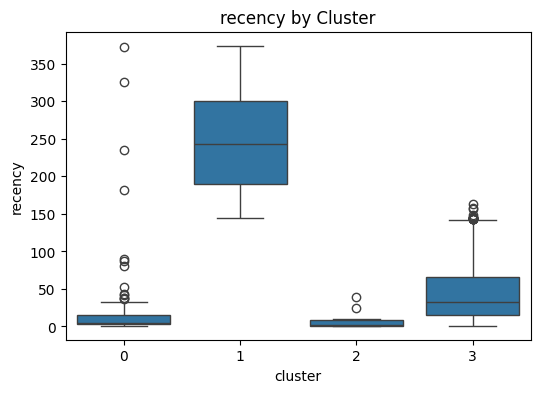

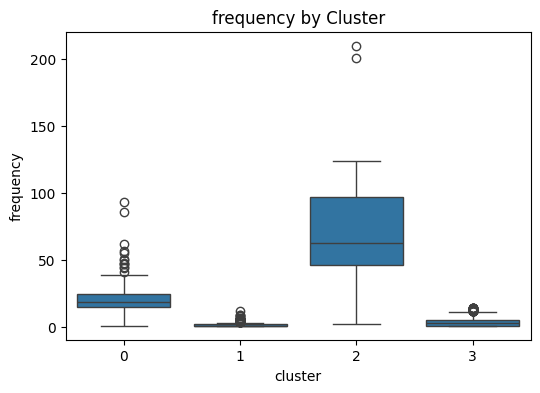

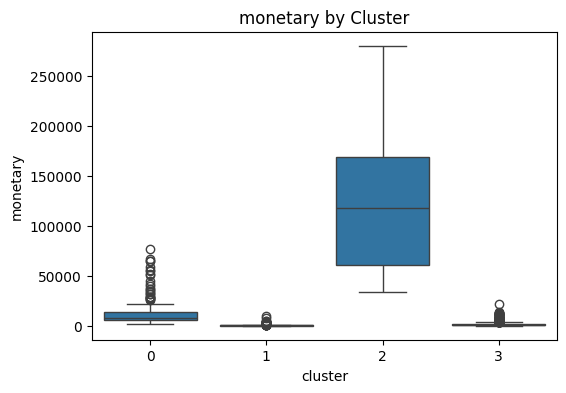

In [15]:
for feature in ['recency', 'frequency', 'monetary']:
  plt.figure(figsize=(6,4))
  sns.boxplot(data = rfm, x = 'cluster', y=feature)
  plt.title(f'{feature} by Cluster')
  plt.show()

##To find center

In [16]:
rfm.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'cluster': 'count'
}).rename(columns={'cluster': 'Count'}).round(1)


,recency,frequency,monetary,Count
cluster,,,,
0,15.7,22.0,12453.2,211
1,248.6,1.6,478.1,1062
2,7.4,82.7,127338.3,13
3,43.9,3.7,1349.7,3053


##Visualiisaion

In [17]:
cluster_map = {
    0: 'New Buyers',      #Low recency, low freq & monetary
    1: 'Poential loyal',  #Medium all
    2: 'Lost Customers',  #High recency, low freq & monetary
    3: 'Loyal Customers'  #high freq and monetary
}

rfm['segment'] = rfm['cluster'].map(cluster_map)

In [18]:
rfm.head()

,recency,frequency,monetary,cluster,segment
CustomerID,,,,,
12346.0,326,1,77183.60,0,New Buyers
12347.0,2,7,4310.00,3,Loyal Customers
12348.0,75,4,1797.24,3,Loyal Customers
12349.0,19,1,1757.55,3,Loyal Customers
12350.0,310,1,334.40,1,Poential loyal


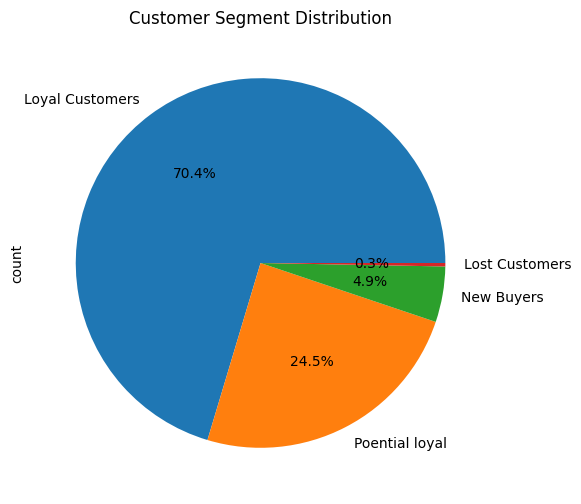

In [19]:
rfm['segment'].value_counts().plot.pie(autopct='%1.1f%%', figsize = (6,6))
plt.title("Customer Segment Distribution")
plt.show()